In [1]:
from datasets import load_dataset
import pandas as pd
dfs = []
max_per_dataset = 50000

In [2]:

ds = load_dataset("miracFence/scientific_papers_en_es")
df = ds["train"].to_pandas()
# rename text_no_abstract to EN
df = df.rename(columns={"text_no_abstract": "EN", "translated": "ES"})
df['dataset'] = 'scientific_papers_en_es'
df = df[['dataset', 'EN', 'ES']]
# remove null on ES or EN
print("before", df.shape)
df = df.dropna(subset=['EN', 'ES'])
# apply strip to EN and ES
df['EN'] = df['EN'].str.strip()
df['ES'] = df['ES'].str.strip()
# remove empty strings
df = df[(df['EN'] != '') & (df['ES'] != '')]
df['split'] = 'test'
print("after", df.shape)
df = df[['dataset', 'split', 'EN', 'ES']].reset_index(drop=True)
dfs.append(df)

before (1754, 3)
after (1754, 4)


In [3]:
df

,dataset,split,EN,ES
0,scientific_papers_en_es,test,Introduction and preliminaries\nThe focus of t...,Descomposiciones del gráfico de certificación ...
1,scientific_papers_en_es,test,Introduction \nThe popularly accepted theory f...,La evolución del sistema Tierra-Luna basado en...
2,scientific_papers_en_es,test,Introduction The chief purpose of this paper i...,Un determinante de los números de ciclo de Sti...
3,scientific_papers_en_es,test,FROM DYADIC Λα TO Λα\nWAEL ABU-SHAMMALA AND AL...,DE DÍA A DÍA\nWAEL ABU-SHAMMALA Y ALBERTO TORC...
4,scientific_papers_en_es,test,Polymer Quantum Mechanics and its Continuum Li...,La mecánica cuántica de polímeros y su límite ...
...,...,...,...,...
1749,scientific_papers_en_es,test,Introduction\nOur goal in this paper is to emb...,LPTENS–07/16\nAbril de 2007\nUna función de on...
1750,scientific_papers_en_es,test,Microsoft Word - negEntr.doc\nQuery on Negativ...,Microsoft Word - negEntr.doc\nConsulta sobre t...
1751,scientific_papers_en_es,test,Introduction\n\tBasis of Two Measures Field Th...,Ausencia del problema de la quinta fuerza en u...
1752,scientific_papers_en_es,test,"Draft version November 16, 2018\nPreprint type...",Proyecto de versión 16 de noviembre de 2018\nT...


In [4]:
ds = load_dataset("kudo-research/mustc-en-es-text-only")
train_df = ds["train"].to_pandas()
train_df = train_df.sample(n=min(len(train_df), max_per_dataset), random_state=42)
val_df = ds["dev"].to_pandas()
test_df = ds["test"].to_pandas()
train_df['split'] = 'train'
val_df['split'] = 'validation'
test_df['split'] = 'test'
df = pd.concat([train_df, val_df, test_df], ignore_index=True)
df['dataset'] = 'mustc-en-es-text-only'
df['EN'] = df['translation'].apply(lambda x: x['en']).str.strip()
df['ES'] = df['translation'].apply(lambda x: x['es']).str.strip()
df = df[['dataset', 'EN', 'ES', 'split']]
# remove null on ES or EN
print("before", df.shape)
df = df.dropna(subset=['EN', 'ES'])
# remove empty strings
df = df[(df['EN'] != '') & (df['ES'] != '')]
print("after", df.shape)
df = df[['dataset', 'split', 'EN', 'ES']].reset_index(drop=True)
dfs.append(df)

before (53818, 4)
after (53818, 4)


In [5]:

ds = load_dataset("loresiensis/corpus-en-es")
train_df = ds["train"].to_pandas()
train_df = train_df.sample(n=min(len(train_df), max_per_dataset), random_state=42)
test_df = ds["test"].to_pandas()
train_df['split'] = 'train'
test_df['split'] = 'test'
df = pd.concat([train_df, test_df], ignore_index=True)
df['dataset'] = 'corpus-en-es'
df = df[['dataset', 'EN', 'ES', 'split']]
# remove null on ES or EN
print("before", df.shape)
df = df.dropna(subset=['EN', 'ES'])
# apply strip to EN and ES
df['EN'] = df['EN'].str.strip()
df['ES'] = df['ES'].str.strip()
# remove empty strings
df = df[(df['EN'] != '') & (df['ES'] != '')]
print("after", df.shape)
df = df[['dataset', 'split', 'EN', 'ES']].reset_index(drop=True)
dfs.append(df)

before (10488, 4)
after (10425, 4)


In [6]:
df

,dataset,split,EN,ES
0,corpus-en-es,train,Reading the Laeken resolutions reminded me of ...,Al leer los resultados de Laeken me vino a las...
1,corpus-en-es,train,"As Mr Herzog said, I do not believe that the a...",A esta visión de renuncia y a la ilusión de un...
2,corpus-en-es,train,I therefore agree that we must avoid any kind ...,Reconozco por consiguiente que es necesario ev...
3,corpus-en-es,train,The ability to impose sanctions is one of the ...,La capacidad de imponer sanciones es uno de lo...
4,corpus-en-es,train,So which is better - to keep putting away mone...,"Así pues, ¿qué es mejor: asignar dinero a defe..."
...,...,...,...,...
10420,corpus-en-es,test,"Mr President, Commissioner, the Economic Partn...","Señor Presidente, Señorías, señor Comisario, e..."
10421,corpus-en-es,test,Rather than rushing to condemn Israel again?,Más que precipitarnos para aplastar de nuevo a...
10422,corpus-en-es,test,The other institutions also need to emulate th...,El sentido de responsabilidad que hoy el Parla...
10423,corpus-en-es,test,"Mr President-in-Office, this question raises t...","Señor Presidente en funciones, esta cuestión p..."


In [7]:
ds = load_dataset("Thermostatic/OPUS-books-EN-ES")
df = ds["train"].to_pandas()
df = df.sample(n=min(len(df), max_per_dataset), random_state=42)
# English to EN and Spanish to ES
df = df.rename(columns={"English": "EN", "Spanish": "ES"})
df['dataset'] = 'OPUS-books-EN-ES'
df = df[['dataset', 'EN', 'ES']]
# remove null on ES or EN
print("before", df.shape)
df = df.dropna(subset=['EN', 'ES'])
# apply strip to EN and ES
df['EN'] = df['EN'].str.strip()
df['ES'] = df['ES'].str.strip()
# remove empty strings
df = df[(df['EN'] != '') & (df['ES'] != '')]
df['split'] = 'train'
print("after", df.shape)
df = df[['dataset', 'split', 'EN', 'ES']].reset_index(drop=True)
dfs.append(df)

before (50000, 3)
after (50000, 4)


In [8]:
df

,dataset,split,EN,ES
0,OPUS-books-EN-ES,train,"He was the friend of the king, who honored hig...","Era el amigo del rey, que honraba mucho, como ..."
1,OPUS-books-EN-ES,train,Oblonsky was right in this surmise.,Esteban Arkadievich acertaba.
2,OPUS-books-EN-ES,train,"""Sixteen minutes to nine!"" said John Sullivan,...",¡Las ocho y cuarenta y cuatro! dijo John Suili...
3,OPUS-books-EN-ES,train,I stared at him with horror and disgust.,Lo contemplé con un sentimiento de horror.
4,OPUS-books-EN-ES,train,The Canadian and I sat him up; we massaged his...,El canadiense y yo le levantamos y le friccion...
...,...,...,...,...
49995,OPUS-books-EN-ES,train,"""Were they on the same side of the path as the...",-¿Estaban en el lado del paseo donde se encuen...
49996,OPUS-books-EN-ES,train,"""Evening approaches,"" said I, as I looked towa...","«Ya está oscureciendo -medité, acercándome a l..."
49997,OPUS-books-EN-ES,train,"All, you know, is prepared for prompt departur...",Todo está preparado para tu marcha. Mañana pue...
49998,OPUS-books-EN-ES,train,Who would think that the Evil One had already ...,¿Quién pensaría que el Enemigo tiene en ella u...


In [9]:

ds = load_dataset("ignacioct/wikipedia_en_es_m2m")
train_df = ds["train"].to_pandas()
test_df = ds["test"].to_pandas()
train_df['split'] = 'train'
test_df['split'] = 'test'
df = pd.concat([train_df, test_df], ignore_index=True)
df['dataset'] = 'wikipedia_en_es_m2m'
# en_sentence to EN and es_sentence to ES
df = df.rename(columns={"en_sentence": "EN", "es_sentence": "ES"})
df = df[['dataset', 'EN', 'ES', 'split']]
# remove null on ES or EN
print("before", df.shape)
df = df.dropna(subset=['EN', 'ES'])
# apply strip to EN and ES
df['EN'] = df['EN'].str.strip()
df['ES'] = df['ES'].str.strip()
# remove empty strings
df = df[(df['EN'] != '') & (df['ES'] != '')]
print("after", df.shape)
df = df[['dataset', 'split', 'EN', 'ES']].reset_index(drop=True)
dfs.append(df)

before (30000, 4)
after (30000, 4)


In [10]:

ds = load_dataset("Iker/Document-Translation-en-es")
df = ds["train"].to_pandas()
df['dataset'] = 'Document-Translation-en-es'
# es to ES and en to EN
df = df.rename(columns={"en": "EN", "es": "ES"})
df = df[['dataset', 'EN', 'ES']]
# remove null on ES or EN
print("before", df.shape)
df = df.dropna(subset=['EN', 'ES'])
# apply strip to EN and ES
df['EN'] = df['EN'].str.strip()
df['ES'] = df['ES'].str.strip()
# remove empty strings
df = df[(df['EN'] != '') & (df['ES'] != '')]
df['split'] = 'train'
print("after", df.shape)
df = df[['dataset', 'split', 'EN', 'ES']].reset_index(drop=True)
dfs.append(df)

before (10533, 3)
after (10533, 4)


In [11]:
ds = load_dataset("aimped/medical-translation-test-set")
df = ds["en_es"].to_pandas()
df['dataset'] = 'medical-translation-test-set'
# source to EN and target to ES
df = df.rename(columns={"source": "EN", "target": "ES"})
df = df[['dataset', 'EN', 'ES']]
# remove null on ES or EN
print("before", df.shape)
df = df.dropna(subset=['EN', 'ES'])
# apply strip to EN and ES
df['EN'] = df['EN'].str.strip()
df['ES'] = df['ES'].str.strip()
# remove empty strings
print("after", df.shape)
df = df[(df['EN'] != '') & (df['ES'] != '')]
df['split'] = 'test'
print("after", df.shape)
df = df[['dataset', 'split', 'EN', 'ES']].reset_index(drop=True)
dfs.append(df)


before (1127, 3)
after (1127, 3)
after (1127, 4)


In [12]:

ds = load_dataset("kirchik47/english-spanish-translator")
df = ds["train"].to_pandas()
df = df.sample(n=min(len(df), max_per_dataset), random_state=42)
df['dataset'] = 'english-spanish-translator'
# sentences_en to EN and sentences_es to ES
df = df.rename(columns={"sentences_en": "EN", "sentences_es": "ES"})
df = df[['dataset', 'EN', 'ES']]
# remove null on ES or EN
print("before", df.shape)
df = df.dropna(subset=['EN', 'ES'])
# apply strip to EN and ES
df['EN'] = df['EN'].str.strip()
df['ES'] = df['ES'].str.strip()
# remove empty strings
df = df[(df['EN'] != '') & (df['ES'] != '')]
df['split'] = 'train'
print("after", df.shape)
df = df[['dataset', 'split', 'EN', 'ES']].reset_index(drop=True)
dfs.append(df)

before (50000, 3)
after (50000, 4)


In [13]:
df = pd.concat(dfs, ignore_index=True)
# remove null
df = df.dropna(subset=['EN', 'ES'])
# remove duplicates
# apply strip to EN and ES
df['EN'] = df['EN'].str.strip()
df['ES'] = df['ES'].str.strip()
# remove empty strings
df = df[(df['EN'] != '') & (df['ES'] != '')]
df = df.drop_duplicates(subset=['EN', 'ES']).reset_index(drop=True)
df

,dataset,split,EN,ES
0,scientific_papers_en_es,test,Introduction and preliminaries\nThe focus of t...,Descomposiciones del gráfico de certificación ...
1,scientific_papers_en_es,test,Introduction \nThe popularly accepted theory f...,La evolución del sistema Tierra-Luna basado en...
2,scientific_papers_en_es,test,Introduction The chief purpose of this paper i...,Un determinante de los números de ciclo de Sti...
3,scientific_papers_en_es,test,FROM DYADIC Λα TO Λα\nWAEL ABU-SHAMMALA AND AL...,DE DÍA A DÍA\nWAEL ABU-SHAMMALA Y ALBERTO TORC...
4,scientific_papers_en_es,test,Polymer Quantum Mechanics and its Continuum Li...,La mecánica cuántica de polímeros y su límite ...
...,...,...,...,...
205959,english-spanish-translator,train,Something is still not right.,Algo aún no está bien.
205960,english-spanish-translator,train,I lost the game.,Perdí el juego.
205961,english-spanish-translator,train,I'm really anxious to know what my parents are...,Estoy muy ansioso por saber lo que me van a re...
205962,english-spanish-translator,train,I'll come by later.,Pasaré más tarde.


In [14]:
# save to exp-data/en-es.parquet
df.to_parquet("exp-data/en-es.parquet", index=False)

In [15]:
df['split'].value_counts()

split
train         193322
test           11338
validation      1304
Name: count, dtype: int64

In [16]:
df['en-length'] = df['EN'].str.split().apply(len)
df['es-length'] = df['ES'].str.split().apply(len)

<Axes: ylabel='Frequency'>

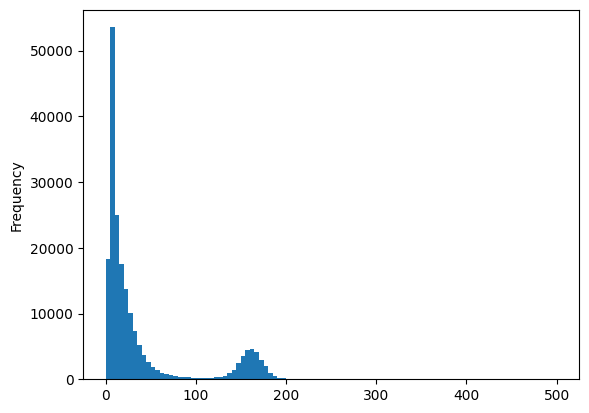

In [17]:
df['en-length'].plot.hist(bins=100, range=(0, 500))

<Axes: ylabel='Frequency'>

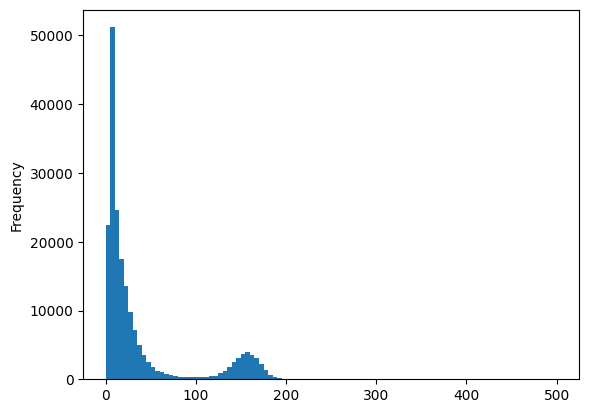

In [18]:
df['es-length'].plot.hist(bins=100, range=(0, 500))